Simple efficiency example
====

Let's define some PDFs and an efficiency that all look like step functions:

$p_1(x) = 1, x < 0; 0.1, x > 0$  
$p_2(x) = 0.1, x < 0; 1, x > 0$

$\epsilon(x) = 1, x < 0; 0.5, x > 0$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

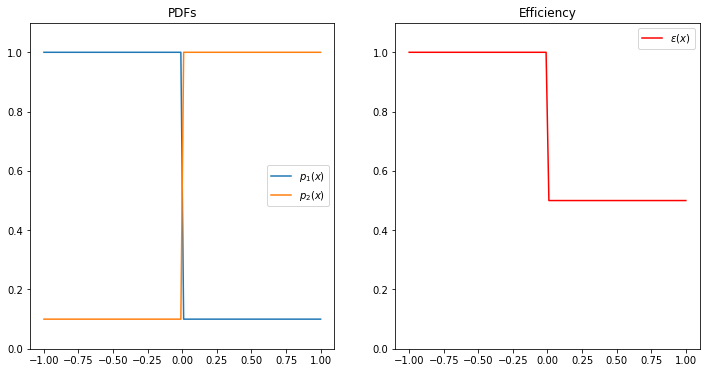

In [2]:
# Define and plot efficiency and pdfs
pdf_domain = -1.0, 1.0
pdf_range = 0.0, 1.1

def p1(x):
    if x < 0:
        return 1
    return 0.1

def p2(x):
    if x < 0:
        return 0.1
    return 1

def e(x):
    if x < 0:
        return 1
    return 0.5

domain = np.linspace(pdf_domain[0], pdf_domain[1], 100)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(domain, [p1(x) for x in domain], label=r"$p_1(x)$")
ax[0].plot(domain, [p2(x) for x in domain], label=r"$p_2(x)$")
ax[0].set_title("PDFs")
ax[0].set_ylim((0.0, 1.1))

ax[1].plot(domain, [e(x) for x in domain], label=r"$\epsilon(x)$", color="r")
ax[1].set_title("Efficiency")
ax[1].set_ylim((0.0, 1.1))

ax[0].legend()
ax[1].legend()
plt.show()

If we take random samples of size $N_1$ and $N_2$ from the distributions, we would expect to find
$\frac{20}{21}N_1 + \frac{1}{6}N_2$ samples in the region $x < 0$ and $\frac{5}{6}N_2 + \frac{1}{21}N_1$ samples in the region $x > 0$.

(The efficiency $\epsilon(x)$ means it is not immediately obvious (to me) what the coefficients in the above equation should be)


In [3]:
rng = np.random.default_rng()

def sample(N, pdf):
    """
    Use accept-reject sampling to get N samples from pdf
    
    slow
    
    """
    if N == 0:
        return []
    
    points = np.zeros(N)
    num_generated = 0

    while num_generated < N:
        # Generate a point
        x = pdf_domain[0] + (pdf_domain[1] - pdf_domain[0]) * rng.random()
        y = pdf_range[0] + (pdf_range[1] - pdf_range[0]) * rng.random()

        if y < pdf(x):
            points[num_generated] = x
            num_generated += 1

    return points

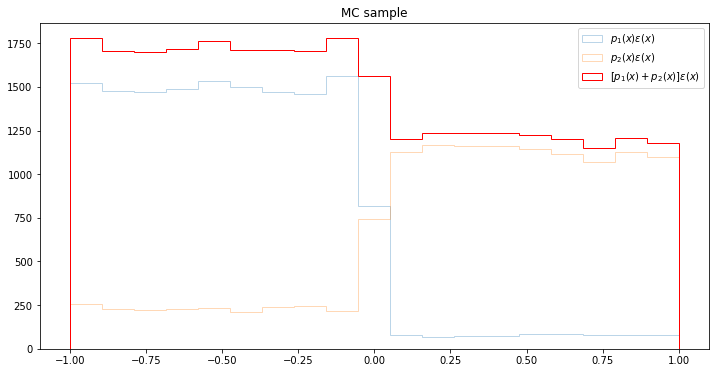

Expected:	16452.4;	11547.6	in regions x<0 and x>0
Actual:		16457;		11543


In [4]:
# Take samples from both p1(x) and p2(x); keeping the efficiency
N1, N2 = 15000, 13000

# Take samples including the efficiency
p1_sample = sample(N1, lambda x: p1(x) * e(x))
p2_sample = sample(N2, lambda x: p2(x) * e(x))

combined_sample = np.concatenate((p1_sample, p2_sample))

kw = {"bins": np.linspace(-1, 1, 20), "histtype": "step"}
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax.hist(p1_sample, **kw, label=r"$p_1(x)\epsilon(x)$", alpha=0.3)
ax.hist(p2_sample, **kw, label=r"$p_2(x)\epsilon(x)$", alpha=0.3)
ax.hist(combined_sample, **kw, label="$[p_1(x) + p_2(x)]\epsilon(x)$", color="r")
ax.legend()
ax.set_title("MC sample")
plt.show()

expected_neg = 20.0 * N1 / 21.0 + N2 / 6.0
expected_pos = 5.0 * N2 / 6.0 + N1 / 21.0

actual_neg = np.sum(combined_sample < 0)
actual_pos = np.sum(combined_sample > 0)

print(f"Expected:\t{expected_neg:.1f};\t{expected_pos:.1f}\tin regions x<0 and x>0")
print(f"Actual:\t\t{actual_neg};\t\t{actual_pos}")

The PDF describing this combined distribution is $p(x) = I_1p_1(x) + I_2p_2(x)$, with

$I_1 = \sum_i^{N_1}1/p_1(x_i)$ etc.

In our case this is $p(x) = \frac{10}{7}N_1p_1(x) + \frac{5}{2}N_2p_2(x)$

Postulate that the "true" PDF describing our combined distribution is $p(x)\epsilon(x)$; we should be able to find the efficiency by taking a sample from the $p(x)$:

In [ ]:
def combined_pdf(x):
    return 10.0 * N1 * p1(x) / 7.0 + 5.0 * N2 * p2(x) / 2.0

fig, ax = plt.subplots(1, 1, figsize=(12.0, 6.0))
ax.plot(domain, [combined_pdf(x) for x in domain])
plt.show()